<a href="https://colab.research.google.com/github/bkc111/Image-Uploader/blob/master/Ethereum_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ethereum + AI + *neo4j* Project 



# Predict The Future Price of Ethereum using Artificial Intelligence


The rise of cryptocurrencies Cryptocurrency is a major topic of discussion recently as its market cap surged to a record $2 trillion in April 2021. To put that into comparison, the market cap of Apple, a 45 year old company has a market cap of around 2 trillion dollars as well. If you don’t know about cryptocurrencies yet, it might be the time to start learning about them. They are branded as the future of not just money, but many processes and operations that power our day-to-day lives. In simple terms, it’s like an amalgamation of cryptography, programming, and finance. Talking about cryptocurrency, Ethereum is the second-largest cryptocurrency by market capitalization, right behind Bitcoin. Its main purpose is to help execute decentralized smart contracts. As of today, its market cap is larger that big companies like Walmart, Netflix and Disney. In this article, I will be predicting the price of Ethereum for the following year. Predicting cryptocurrency price Predicting cryptocurrency price is difficult and some might even say it’s a waste of time, this is because of how volatile it is, especially since it’s still nascent in its development. Some people say that cryptocurrency is like internet in the 1980s, and I think that describes it very well. Nonetheless, predicting cryptocurrency price is a very interesting topic and can be a fun project to work on if you’re interested in time series analysis, in finance or data science in general. Time Series data Cryptocurrency price, like stock price, is a time series data. As you know, there are many different algorithms in machine learning, each have their own purpose for different use cases.

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

Download DataSet : https://github.com/Projects-Developer/Ethereum-Project/blob/main/newFile.csv

In [ ]:
import pandas as pd

fm = pd.read_csv('newFile.csv')

print(fm) 


       Unix Timestamp     Open     High      Low    Close        Volume  Year  \
0        1.620690e+12  3952.66  3966.87  3940.89  3940.89     27.539891  2022   
1        1.620690e+12  4038.07  4038.07  3890.26  3952.66   1412.992659  2022   
2        1.620680e+12  4023.66  4070.66  3985.77  4038.07   1377.449847  2022   
3        1.620680e+12  3910.99  4044.00  3873.01  4023.66   1450.977235  2022   
4        1.620680e+12  3989.21  3990.26  3500.00  3910.99  14639.051020  2022   
...               ...      ...      ...      ...      ...           ...   ...   
43852    1.462813e+09     9.83     9.83     9.48     9.49    329.553213  2022   
43853    1.462810e+09     9.99     9.99     9.79     9.83     62.379450  2022   
43854    1.462806e+09    10.00    10.00     9.99     9.99     10.973567  2022   
43855    1.462802e+09     9.55    10.00     9.55    10.00    235.774075  2022   
43856    1.462799e+09     0.00    12.00     0.00     9.55    432.562115  2022   

       Failure  Success  
0

In [ ]:
fm.head()

,Unix Timestamp,Open,High,Low,Close,Volume,Year,Failure,Success
0,1.620690e+12,3952.66,3966.87,3940.89,3940.89,27.539891,2022,0,1
1,1.620690e+12,4038.07,4038.07,3890.26,3952.66,1412.992659,2022,0,1
2,1.620680e+12,4023.66,4070.66,3985.77,4038.07,1377.449847,2022,0,1
3,1.620680e+12,3910.99,4044.00,3873.01,4023.66,1450.977235,2022,0,1
4,1.620680e+12,3989.21,3990.26,3500.00,3910.99,14639.051020,2022,0,1


In [ ]:
fm.tail()

,Unix Timestamp,Open,High,Low,Close,Volume,Year,Failure,Success
43852,1.462813e+09,9.83,9.83,9.48,9.49,329.553213,2022,0,1
43853,1.462810e+09,9.99,9.99,9.79,9.83,62.379450,2022,0,1
43854,1.462806e+09,10.00,10.00,9.99,9.99,10.973567,2022,0,1
43855,1.462802e+09,9.55,10.00,9.55,10.00,235.774075,2022,0,1
43856,1.462799e+09,0.00,12.00,0.00,9.55,432.562115,2022,0,1


In [ ]:
fm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43857 entries, 0 to 43856
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unix Timestamp  43857 non-null  float64
 1   Open            43857 non-null  float64
 2   High            43857 non-null  float64
 3   Low             43857 non-null  float64
 4   Close           43857 non-null  float64
 5   Volume          43857 non-null  float64
 6   Year            43857 non-null  int64  
 7   Failure         43857 non-null  int64  
 8   Success         43857 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 3.0 MB


In [ ]:
!pip install py2neo==4.1.3 pandas matplotlib sklearn


     |████████████████████████████████| 70 kB 4.4 MB/s 
     |████████████████████████████████| 188 kB 17.6 MB/s 
     |████████████████████████████████| 247 kB 47.9 MB/s 
     |████████████████████████████████| 132 kB 52.8 MB/s 
     |████████████████████████████████| 191 kB 51.7 MB/s 
  Created wheel for py2neo: filename=py2neo-4.1.3-py2.py3-none-any.whl size=89812 sha256=12991be2f748db83f05155cb4bf3416f9972e11ccbf31b798ab1f865375efea3
  Stored in directory: /root/.cache/pip/wheels/96/9c/fd/2ce24f7771b6707a6c5f46af86d81ba4030c604f16dcf4c504
  Created wheel for neotime: filename=neotime-1.0.0-py3-none-any.whl size=14714 sha256=1f905dae984529866aab9c520e837e44bea956160ae8ef1765ab624a88854e2d
  Stored in directory: /root/.cache/pip/wheels/6e/53/79/7045b9d082d0671e91faeebdc5f8bd7d4358a9a7b9df8b302d
  Created wheel for neo4j-driver: filename=neo4j_driver-1.6.2-cp37-cp37m-linux_x86_64.whl size=521136 sha256=bfe5a1a1ab5d2cf99e881878b908efe6a5df31e72de62c21541d6cb02a95323c
  Stored in direct

In [ ]:
#Import dependencies
from py2neo import Graph, Node, Relationship
import pandas as pd

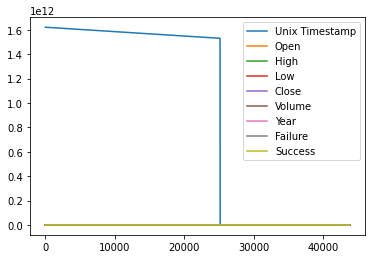

In [ ]:
import matplotlib.pyplot as plt
fm.plot()

In [ ]:
import matplotlib.pyplot as plt
plt.show()

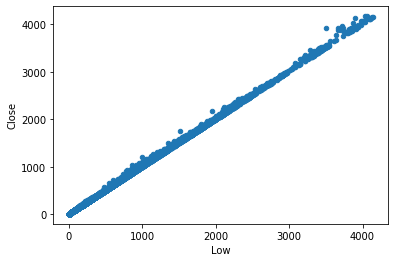

In [ ]:
fm.plot(kind = 'scatter', x = 'Low', y = 'Close')

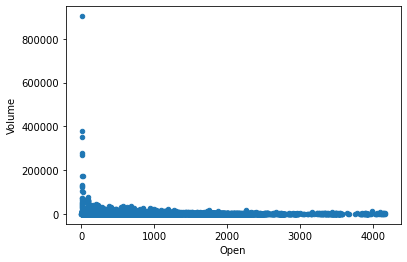

In [ ]:
fm.plot(kind = 'scatter', x = 'Open', y = 'Volume')

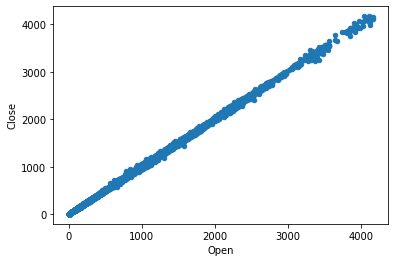

In [ ]:
fm.plot(kind = 'scatter', x = 'Open', y = 'Close')

In [ ]:
fm = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2015", periods=1000))


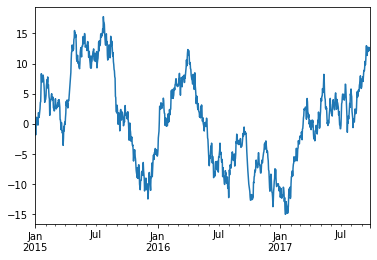

In [ ]:
fm = fm.cumsum()
fm.plot();

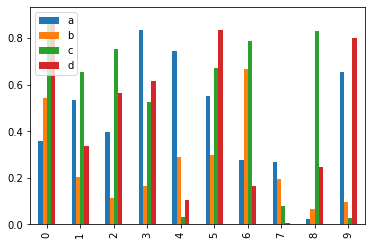

In [ ]:
fm = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])

fm.plot.bar();

In [ ]:


#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
fm.shape

(10, 4)

In [ ]:
import pandas as pd
fm=pd.read_csv("newFile.csv")
fm.head()

,Unix Timestamp,Open,High,Low,Close,Volume,Year,Failure,Success
0,1.620690e+12,3952.66,3966.87,3940.89,3940.89,27.539891,2022,0,1
1,1.620690e+12,4038.07,4038.07,3890.26,3952.66,1412.992659,2022,0,1
2,1.620680e+12,4023.66,4070.66,3985.77,4038.07,1377.449847,2022,0,1
3,1.620680e+12,3910.99,4044.00,3873.01,4023.66,1450.977235,2022,0,1
4,1.620680e+12,3989.21,3990.26,3500.00,3910.99,14639.051020,2022,0,1


In [ ]:
fm.describe()

,Unix Timestamp,Open,High,Low,Close,Volume,Year,Failure,Success
count,4.385700e+04,43857.000000,43857.000000,43857.000000,43857.000000,43857.000000,43857.0,43857.0,43857.0
mean,9.045220e+11,370.550996,373.400193,367.398453,370.640771,1443.219469,2022.0,0.0,1.0
std,7.786020e+11,493.277894,497.590808,488.422270,493.569216,6255.096310,0.0,0.0,0.0
min,1.462799e+09,0.000000,6.150000,0.000000,6.100000,0.000000,2022.0,0.0,1.0
25%,1.502269e+09,126.720000,127.410000,125.610000,126.730000,130.371999,2022.0,0.0,1.0
50%,1.541740e+12,219.370000,220.940000,218.000000,219.380000,470.348881,2022.0,0.0,1.0
75%,1.581220e+12,397.760000,400.420000,395.450000,397.900000,1398.809934,2022.0,0.0,1.0
max,1.620690e+12,4168.590000,4345.440000,4140.820000,4168.590000,903102.685700,2022.0,0.0,1.0


In [ ]:
fm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43857 entries, 0 to 43856
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unix Timestamp  43857 non-null  float64
 1   Open            43857 non-null  float64
 2   High            43857 non-null  float64
 3   Low             43857 non-null  float64
 4   Close           43857 non-null  float64
 5   Volume          43857 non-null  float64
 6   Year            43857 non-null  int64  
 7   Failure         43857 non-null  int64  
 8   Success         43857 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 3.0 MB


In [ ]:
fm.columns

Index(['Unix Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Year',
       'Failure', 'Success', 'Prediction'],
      dtype='object')

In [ ]:
import pandas as pd
fm = pd.read_csv("newFile.csv")
fm["Year"] = "2022"
fm.to_csv("newFile.csv", index=False)


In [ ]:
fm = pd.read_csv("newFile.csv")
fm["Failure"] = "0"
fm["Success"] = "1"
fm.to_csv("newFile.csv", index=False)


In [ ]:
fm.head()

,Unix Timestamp,Open,High,Low,Close,Volume,Year,Failure,Success
0,1.620690e+12,3952.66,3966.87,3940.89,3940.89,27.539891,2022,0,1
1,1.620690e+12,4038.07,4038.07,3890.26,3952.66,1412.992659,2022,0,1
2,1.620680e+12,4023.66,4070.66,3985.77,4038.07,1377.449847,2022,0,1
3,1.620680e+12,3910.99,4044.00,3873.01,4023.66,1450.977235,2022,0,1
4,1.620680e+12,3989.21,3990.26,3500.00,3910.99,14639.051020,2022,0,1


In [ ]:
X = fm.drop('Success', axis=1)
y = fm['Failure']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8772]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8772

    accuracy                           1.00      8772
   macro avg       1.00      1.00      1.00      8772
weighted avg       1.00      1.00      1.00      8772



In [ ]:
import pandas as pd
fm = pd.read_csv("newFile.csv")
fm["Failure"] = "0"
fm.to_csv("newFile.csv", index=False)


In [ ]:
X = np.array(fm[['Open']])



In [ ]:

Y = fm['High'].values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8772]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8772

    accuracy                           1.00      8772
   macro avg       1.00      1.00      1.00      8772
weighted avg       1.00      1.00      1.00      8772



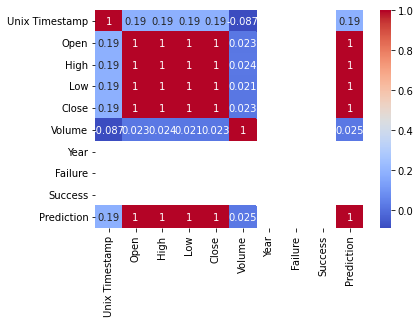

In [ ]:
import seaborn as sns

sns.heatmap(fm.corr(), annot = True, cmap = 'coolwarm')

#Linear Regression Model

In [ ]:
import pandas as pd
import numpy as np

fm = pd.read_csv("newFile.csv")
fm.head()

,Unix Timestamp,Open,High,Low,Close,Volume,Year,Failure,Success
0,1.620690e+12,3952.66,3966.87,3940.89,3940.89,27.539891,2022,0,1
1,1.620690e+12,4038.07,4038.07,3890.26,3952.66,1412.992659,2022,0,1
2,1.620680e+12,4023.66,4070.66,3985.77,4038.07,1377.449847,2022,0,1
3,1.620680e+12,3910.99,4044.00,3873.01,4023.66,1450.977235,2022,0,1
4,1.620680e+12,3989.21,3990.26,3500.00,3910.99,14639.051020,2022,0,1


In [ ]:
# Create a variable to foresee the prices upto 'n' days in the future
pred = 15
# shift to pred units and create a new column Prediction(Prediction is n days in future)
fm['Prediction'] = fm[['Close']].shift(-pred)
# Show the dataset
fm

,Unix Timestamp,Open,High,Low,Close,Volume,Year,Failure,Success,Prediction
0,1.620690e+12,3952.66,3966.87,3940.89,3940.89,27.539891,2022,0,1,4112.22
1,1.620690e+12,4038.07,4038.07,3890.26,3952.66,1412.992659,2022,0,1,4168.59
2,1.620680e+12,4023.66,4070.66,3985.77,4038.07,1377.449847,2022,0,1,4110.62
3,1.620680e+12,3910.99,4044.00,3873.01,4023.66,1450.977235,2022,0,1,4120.04
4,1.620680e+12,3989.21,3990.26,3500.00,3910.99,14639.051020,2022,0,1,4131.61
...,...,...,...,...,...,...,...,...,...,...
43852,1.462813e+09,9.83,9.83,9.48,9.49,329.553213,2022,0,1,NaN
43853,1.462810e+09,9.99,9.99,9.79,9.83,62.379450,2022,0,1,NaN
43854,1.462806e+09,10.00,10.00,9.99,9.99,10.973567,2022,0,1,NaN
43855,1.462802e+09,9.55,10.00,9.55,10.00,235.774075,2022,0,1,NaN


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Create independent dataset with variable X
# Convert dataset to numpy array
X = np.array(fm[['High']])
# Remove NaN values from the Column
X = X[:-pred]


print(X)

[[3966.87]
 [4038.07]
 [4070.66]
 ...
 [   9.36]
 [   9.36]
 [   9.36]]


In [ ]:
# Creating a dependent dataset Y
Y = fm['Low'].values
Y = Y[:-pred]
print(Y)

[3940.89 3890.26 3985.77 ...    9.36    9.36    9.36]


In [ ]:
# split dataset into 80 % training and 20 % test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .2)

In [ ]:
# Create and train the model 
# Create a variable column
linReg =  LinearRegression()
# train the model(fit = train)
linReg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Calculate the score of the model
linReg_confidence  = linReg.score(x_test, y_test)
# print the result
print("The Linear Regression score is: ",linReg_confidence)

The Linear Regression score is:  0.9997389236793132


In [ ]:
# Create a variable to fill the last n rows of data in the table
x_projection = np.array(fm[['Close']])[-pred:]
print(x_projection)

[[ 9.36]
 [ 9.36]
 [ 9.36]
 [ 9.36]
 [ 9.36]
 [ 9.36]
 [ 9.94]
 [ 9.97]
 [ 9.99]
 [ 9.36]
 [ 9.49]
 [ 9.83]
 [ 9.99]
 [10.  ]
 [ 9.55]]


In [ ]:
# Print Linear Regression prediction the price after the 'n' days
linReg_pred = linReg.predict(x_projection)
print("The liner regression prediction : ", linReg_pred)

The liner regression prediction :  [10.20998009 10.20998009 10.20998009 10.20998009 10.20998009 10.20998009
 10.77903663 10.80847059 10.82809323 10.20998009 10.33752725 10.67111211
 10.82809323 10.83790455 10.39639516]


### Linear Regression best model to predict the Open/Closing of Ethereum prices

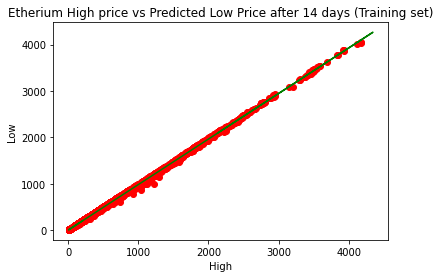

In [ ]:
plt.scatter(x_test, y_test, color = "red")
plt.plot(x_train, linReg.predict(x_train), color = "green")
plt.title("Etherium High price vs Predicted Low Price after 14 days (Training set)")
plt.xlabel("High")
plt.ylabel("Low")
plt.show()

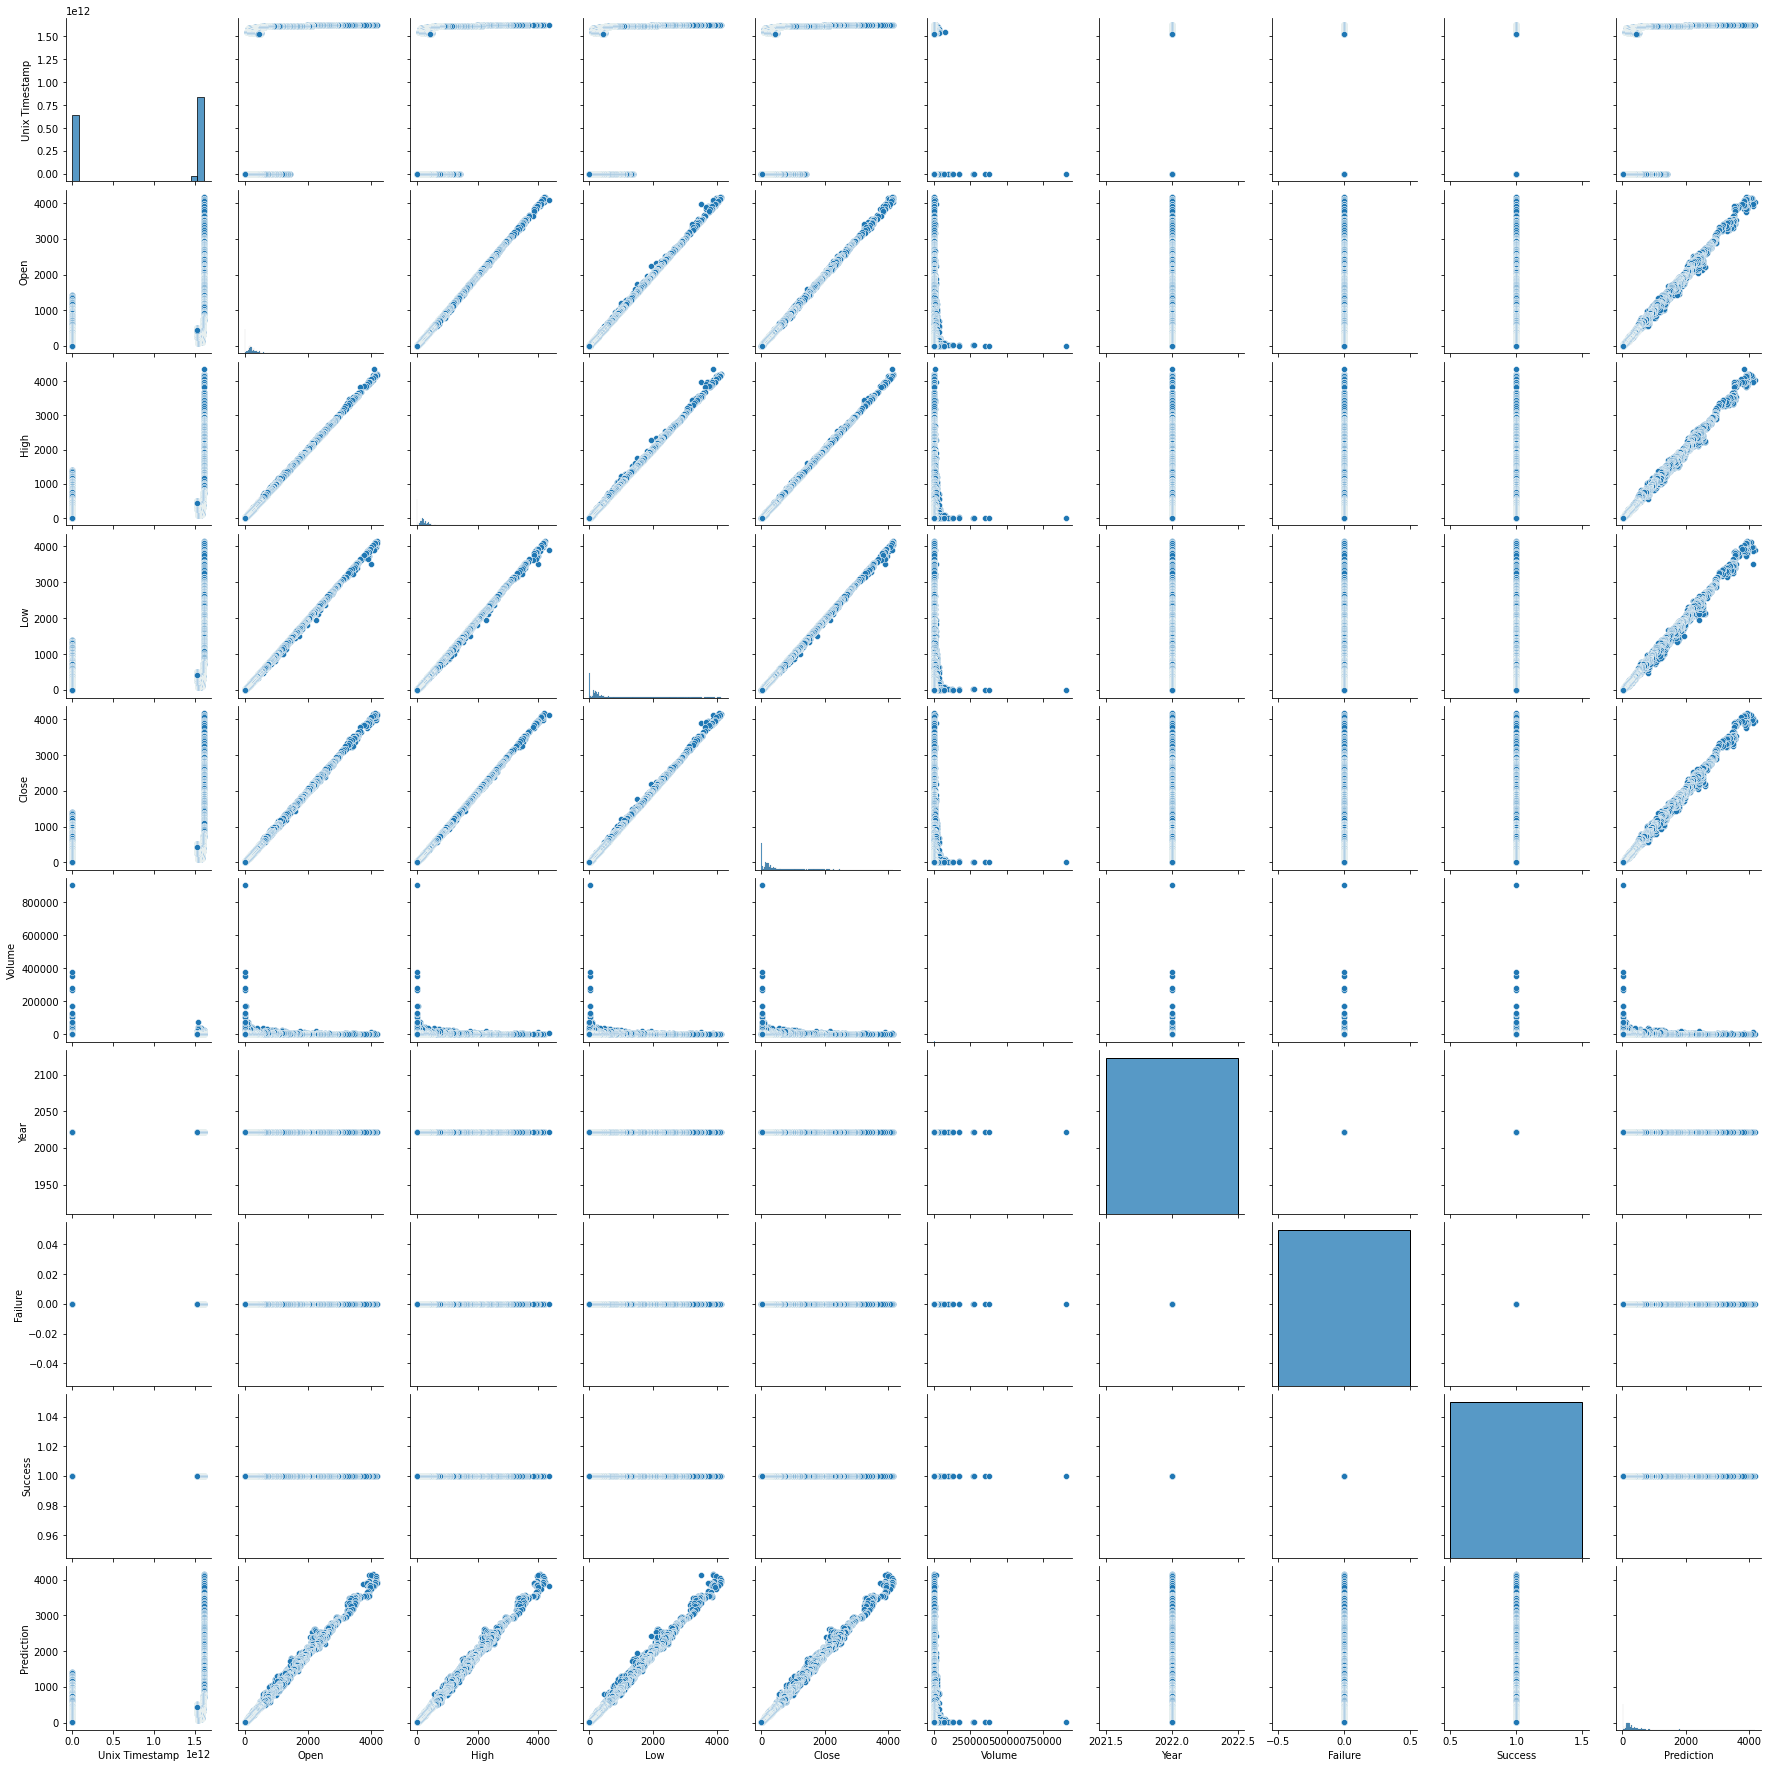

In [ ]:
sns.pairplot(fm)

#For neo4j:

Have to connect to localhost or direct to neo4j web server.
we can also go for 
1. Desktop Application Neo4j
2. Directly Implementing Data into neo4j on browser (live)

In [ ]:
!pip install py2neo -q
from py2neo import Graph
graph = Graph("bolt://localhost:7687")

from IPython.core.magic import register_cell_magic
@register_cell_magic
def nj(line, cell=None):
  return graph.run(cell or line).to_table()

%%nj
MATCH (n) RETURN n

SyntaxError: ignored